In [72]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [116]:
# set up a linear fit
def linear(x, *p):
    a, b = p
    return a*x + b

def chi_squared(x, fit, sig):
     return np.sum(np.square(x-fit)/np.square(sig))

def reduced_chi_squared(x, fit, sig, N, n):
    return chi_squared(x, fit, sig)/(N-n)

In [159]:
# find the +- chi squared values for fit params
def fit_param_uncerts(fit_function, fit_params, x_vals, y_vals, uncerts):
    orig_chi = chi_squared(y_vals, fit_function(x_vals, *fit_params), uncerts)
    out_params=list()
    for i in range(len(fit_params)):
        param=fit_params[i]
        change_change=abs(param*10)
        test_change=abs(param/10)
        avg_change=10 #placeholder
        last_avg_change=1000
        while abs(avg_change -1) > .01:
            fit_params_up=fit_params.copy()
            fit_params_down=fit_params.copy()
            fit_params_up[i]=fit_params[i]+test_change
            fit_params_down[i]=fit_params[i]-test_change

            #find chi squareds
            up_chi = chi_squared(y_vals, fit_function(x_vals, *fit_params_up), uncerts)
            down_chi = chi_squared(y_vals, fit_function(x_vals, *fit_params_down), uncerts)
            avg_change = (up_chi+down_chi-2*orig_chi)/2
            
           # print('Got avg change {} with test change {} and change change {} on param {}'.format(avg_change, test_change, change_change, param))
            
            #update for next run
            if avg_change > 1:
                test_change = min(abs(test_change-change_change), test_change)
            else:
                test_change = abs(test_change+change_change)
            if last_avg_change-1<0 != avg_change-1==0:
                change_change = min(change_change/(2), test_change/10)
            else:
                change_change = min(change_change*2, test_change/10)
                
        out_params.append(test_change)
    return out_params

In [160]:
fit_param_uncerts(linear, popt, bin_means, strain_means, strain_errors)

[2.9692307566559306e-07, 1.5262368088716204e-06]

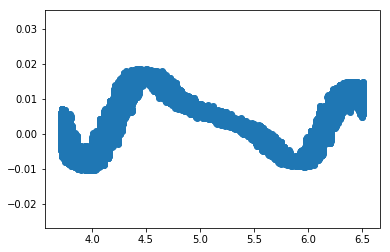

In [100]:
# get the data for calibration
# data tables have the following format:
# first column [0] is stage x strain gauge voltage
# second column [1] is stage y strain gauge voltage
# third column [2] is QPD x voltage
# fourth column [3] is QPD y voltage

# calibration

file_path = '/home/kal/jLab/optical_trapping/calibration_data/'
file_names = [f for f in os.listdir(file_path) if not 'Settings' in f]
file_names = [f for f in file_names if not 'full' in f]

xys = [0 if f.split('.')[-2][-1] == 'x' else 1 for f in file_names]
xys = np.asarray(xys).flatten()
# test one out
file_name = os.path.join(file_path, file_names[0])
calib = pd.read_table(file_name, delimiter='\t', header=None)
calib.columns = 'x_strain y_strain x_volts y_volts'.split()
calib.head()

plt.scatter(calib['x_volts'], calib['x_strain'])
plt.show()


  0%|          | 0/20 [00:00<?, ?it/s]

calib_20181031_1um1000Knacl_100.1x.txt


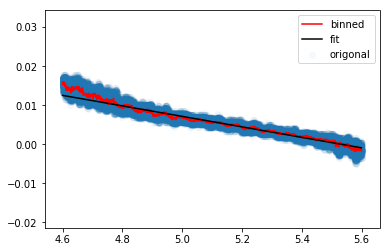


  5%|▌         | 1/20 [00:03<00:57,  3.04s/it]

calib_20181031_1um1000Knacl_100.1y.txt


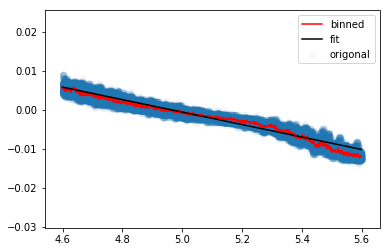


 10%|█         | 2/20 [00:07<00:59,  3.32s/it]

calib_20181031_1um1000Knacl_149.9x.txt


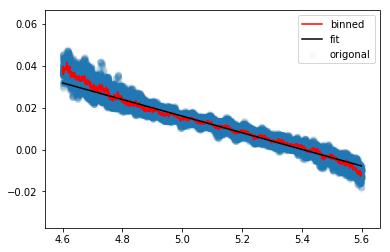


 15%|█▌        | 3/20 [00:10<00:58,  3.42s/it]

calib_20181031_1um1000Knacl_149.9y.txt


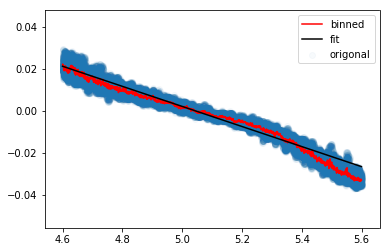


 20%|██        | 4/20 [00:13<00:53,  3.33s/it]

calib_20181031_1um1000Knacl_200.2x.txt


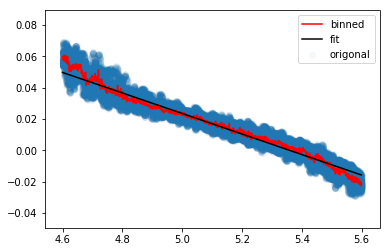


 25%|██▌       | 5/20 [00:17<00:51,  3.40s/it]

calib_20181031_1um1000Knacl_200.2y.txt


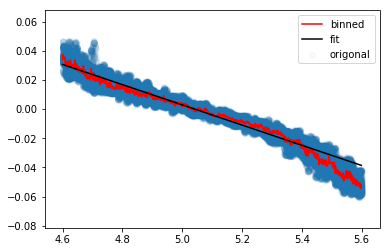


 30%|███       | 6/20 [00:20<00:47,  3.36s/it]

calib_20181031_1um1000Knacl_250.1x.txt


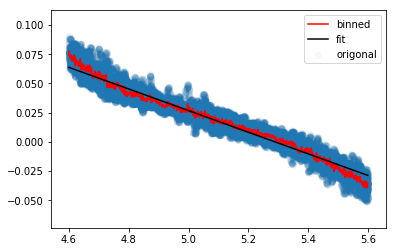


 35%|███▌      | 7/20 [00:23<00:43,  3.32s/it]

calib_20181031_1um1000Knacl_250.1y.txt


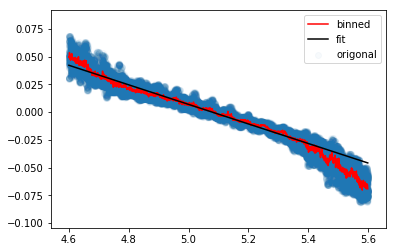


 40%|████      | 8/20 [00:27<00:39,  3.29s/it]

calib_20181031_1um1000Knacl_299.9x.txt


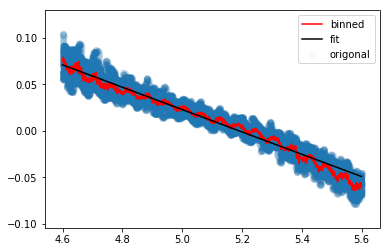


 45%|████▌     | 9/20 [00:30<00:35,  3.25s/it]

calib_20181031_1um1000Knacl_299.9y.txt


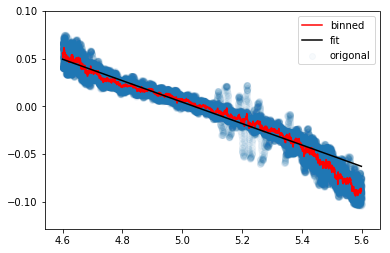


 50%|█████     | 10/20 [00:33<00:32,  3.26s/it]

calib_20181031_1um1000Knacl_350.0x.txt


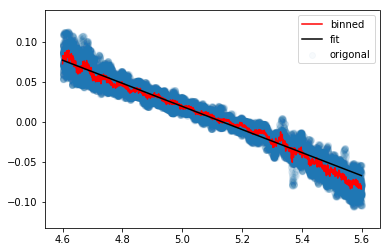


 55%|█████▌    | 11/20 [00:36<00:29,  3.28s/it]

calib_20181031_1um1000Knacl_350.0y.txt


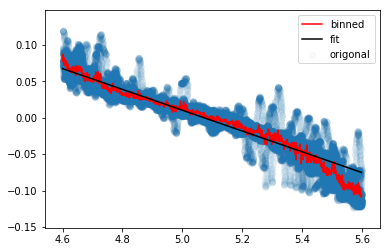


 60%|██████    | 12/20 [00:39<00:25,  3.17s/it]

calib_20181031_1um1000Knacl_400.3x.txt


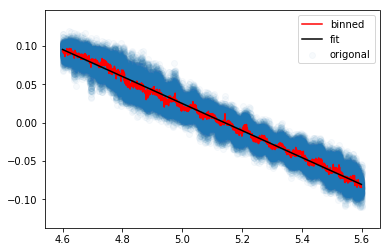


 65%|██████▌   | 13/20 [00:42<00:22,  3.18s/it]

calib_20181031_1um1000Knacl_400.3y.txt


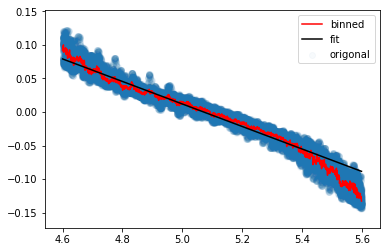


 70%|███████   | 14/20 [00:46<00:19,  3.28s/it]

calib_20181031_1um1000Knacl_450.4x.txt


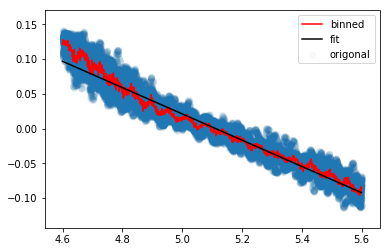


 75%|███████▌  | 15/20 [00:51<00:18,  3.70s/it]

calib_20181031_1um1000Knacl_450.4y.txt


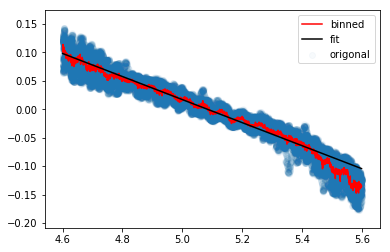


 80%|████████  | 16/20 [00:54<00:14,  3.68s/it]

calib_20181031_1um1000Knacl_495.3x.txt


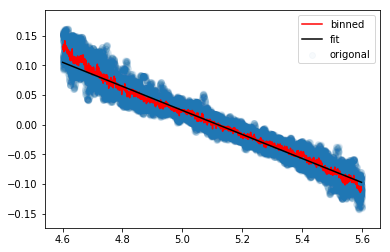


 85%|████████▌ | 17/20 [00:57<00:10,  3.48s/it]

calib_20181031_1um1000Knacl_495.3y.txt


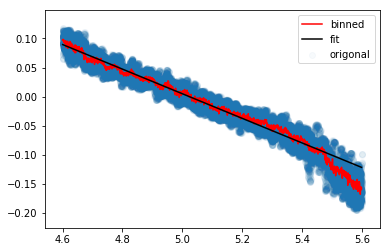


 90%|█████████ | 18/20 [01:00<00:06,  3.37s/it]

calib_20181031_1um1000Knacl_75.7x.txt


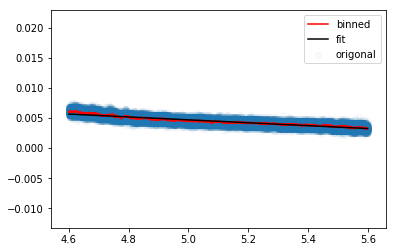


 95%|█████████▌| 19/20 [01:04<00:03,  3.52s/it]

calib_20181031_1um1000Knacl_75.7y.txt


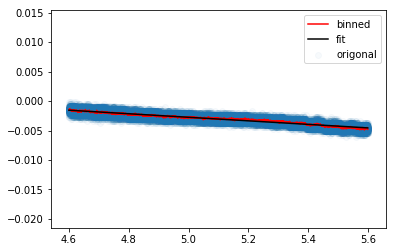


100%|██████████| 20/20 [01:10<00:00,  4.25s/it]


In [161]:
# bin to get errors
voltages= list()
slopes=list()
intercepts=list()
slope_errors=list()
intercept_errors=list()
num_bins=2000
low_cut=4.6
high_cut=5.6
mid = (high_cut+low_cut)/2
diff = (high_cut-low_cut)/2

for file_name in tqdm(file_names):
    print(file_name)
    calib = pd.read_table(os.path.join(file_path, file_name), delimiter='\t', header=None)
    calib.columns = 'x_strain y_strain x_volts y_volts'.split()

    # get specific dataset
    voltage = file_name.split('_')[-1].split('x')[0].split('y')[0]
    if file_name.split('.')[-2][-1] == 'x':
        strain_data = calib[(abs(calib['x_volts'] - mid) <diff)]['x_strain']
        qpd_data = calib[(abs(calib['x_volts'] - mid) <diff)]['x_volts']
    else:
        strain_data = calib[(abs(calib['y_volts'] - mid) <diff)]['y_strain']
        qpd_data = calib[(abs(calib['y_volts'] - mid) <diff)]['y_volts']

    # set up the bin sizes
    bins = np.linspace(min(qpd_data), max(qpd_data), num_bins)
    bin_means = np.asarray(bins + (min(qpd_data)-max(qpd_data))/(2*num_bins))[:-1]

    # bin the data
    digitized = np.digitize(qpd_data, bins)

    strain_means = [np.mean(strain_data[digitized == i]) for i in range(1, len(bins))]
    strain_errors = [scipy.stats.sem(strain_data[digitized == i]) for i in range(1, len(bins))]

    # plot the origonal and binned
    plt.scatter(qpd_data, strain_data, label='origonal', alpha=0.03)
    plt.plot(bin_means, strain_means, 'r', label='binned')

    # curve fit
    # p0 is the initial guess for the fitting coefficients
    p0 = [-10, 10]
    popt, pcov = curve_fit(linear, bin_means, strain_means, p0=p0, sigma=strain_errors)
    # plot the curve fit
    plt.plot(bin_means, linear(bin_means, *popt), 'k', label='fit')
    plt.legend()
    plt.show()
    
    param_errors = fit_param_uncerts(linear, popt, bin_means, strain_means, strain_errors)
    slope_errors.append(param_errors[0])
    intercept_errors.append(param_errors[1])    

    # add to the lists of params
    voltages.append(voltage)
    slopes.append(popt[0])
    intercepts.append(popt[1])

In [188]:
calibrations = pd.DataFrame({'voltage':[float(v) for v in voltages], 'intercept':intercepts, 'slope':slopes, 'xy':xys, 'serr':slope_errors, 'ierr':intercept_errors})
calibrations.head()

,ierr,intercept,serr,slope,voltage,xy
0,0.000003,0.074297,5.196975e-07,-0.013427,100.1,0
1,0.000003,0.079147,5.669950e-07,-0.015953,100.1,1
2,0.000008,0.213976,1.450915e-06,-0.039611,149.9,0
3,0.000006,0.241610,1.046314e-06,-0.047892,149.9,1
4,0.000011,0.350963,2.094898e-06,-0.065492,200.2,0


In [191]:
# fit the qpd-distancec at differnet voltages:
p0=[10, 0]
x_calib, pcov = curve_fit(linear, calibrations[calibrations['xy'] == 1]['voltage'], calibrations[calibrations['xy'] == 1]['slope'], sigma=calibrations[calibrations['xy'] == 1]['serr'], p0=p0)
x_calib, pcov = curve_fit(linear, calibrations[calibrations['xy'] == 0]['voltage'], calibrations[calibrations['xy'] == 0]['slope'], sigma=calibrations[calibrations['xy'] == 0]['serr'], p0=p0)

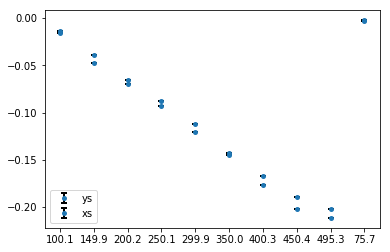

In [171]:
fig, ax = plt.subplots()
ax.errorbar(calibrations[calibrations['xy'] == 1]['voltage'], calibrations[calibrations['xy'] == 1]['slope'], yerr=calibrations[calibrations['xy'] == 1]['serr'], 
            fmt='.', capsize=3, elinewidth=2, markeredgewidth=2, ecolor='black', label='ys')
ax.errorbar(calibrations[calibrations['xy'] == 0]['voltage'], calibrations[calibrations['xy'] == 0]['slope'], yerr=calibrations[calibrations['xy'] == 0]['serr'], 
            fmt='.', capsize=3, elinewidth=2, markeredgewidth=2, ecolor='black', label='xs')

ax.plot(np.linespace())
plt.legend()
plt.show()